In [1]:
import scanpy as sc
sc.settings.set_figure_params(dpi=200,facecolor="white")
sc.logging.print_header()

/home/biotec_poetsch/thda453f/mambaforge/envs/scVelo/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/biotec_poetsch/thda453f/mambaforge/envs/scVelo/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/biotec_poetsch/thda453f/mambaf

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.4 scipy==1.10.1 pandas==2.0.2 scikit-learn==1.1.3 statsmodels==0.14.0 python-igraph==0.10.5 louvain==0.8.0 pynndescent==0.5.10


/home/biotec_poetsch/thda453f/mambaforge/envs/scVelo/lib/python3.8/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [3]:
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.8.17) on 2023-08-10 13:28.


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [4]:
scv.settings.veborsity=3
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautiful visualization

In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1000)

In [6]:
adata=scv.read("RNA_DD191_2.h5ad")
adata

AnnData object with n_obs × n_vars = 3590 × 30733
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'log10GenesPerUMI', 'mitoRatio', 'riboRatio', 'nCount_SCT', 'nFeature_SCT', 'pANN_0.25_0.04_119', 'doublet_detect', 'S.Score', 'G2M.Score', 'Phase', 'pANN_0.25_0.13_117', 'pANN_0.25_0.25_138', 'pANN_0.25_0.16_11', 'pANN_0.25_0.21_184', 'pANN_0.25_0.08_111', 'pANN_0.25_0.05_427', 'pANN_0.25_0.24_316', 'pANN_0.25_0.15_196', 'pANN_0.25_0.04_316', 'pANN_0.25_0.19_445', 'pANN_0.25_0.16_261', 'pANN_0.25_0.16_581', 'pANN_0.25_0.03_141', 'pANN_0.25_0.12_330', 'pANN_0.25_0.24_153', 'pANN_0.25_0.11_124', 'integrated_snn_res.0.4', 'integrated_snn_res.0.6', 'integrated_snn_res.0.8', 'integrated_snn_res.1', 'integrated_snn_res.1.4', 'seurat_clusters'
    var: 'features'
    obsm: 'X_umap'

In [7]:
meta=pd.read_csv("meta_RNA_DD191_2.txt",sep="\t")
meta.iloc[0:5,10:13]

G2M.Score Phase  seurat_clusters
DD191_2-no_AAACCTGAGAGTAATC-1  -0.092895    G1                2
DD191_2-no_AAACCTGAGGAACTGC-1  -0.092602    G1                0
DD191_2-no_AAACCTGAGGATATAC-1   0.134048   G2M               13
DD191_2-no_AAACCTGAGTTGCAGG-1  -0.106340    G1                0
DD191_2-no_AAACCTGCAATGTTGC-1  -0.123501    G1                0

In [8]:
adata.obs=meta
adata.obs

orig.ident  nCount_RNA  nFeature_RNA  \
DD191_2-no_AAACCTGAGAGTAATC-1  DD191_2-no       15607          3495   
DD191_2-no_AAACCTGAGGAACTGC-1  DD191_2-no       18598          4014   
DD191_2-no_AAACCTGAGGATATAC-1  DD191_2-no        8268          2365   
DD191_2-no_AAACCTGAGTTGCAGG-1  DD191_2-no       12056          3005   
DD191_2-no_AAACCTGCAATGTTGC-1  DD191_2-no       38887          5349   
...                                   ...         ...           ...   
DD191_2-no_TTTGTCAGTACAAGTA-1  DD191_2-no        4243          1302   
DD191_2-no_TTTGTCAGTCACTTCC-1  DD191_2-no       23792          4633   
DD191_2-no_TTTGTCAGTCAGAATA-1  DD191_2-no       14002          3731   
DD191_2-no_TTTGTCAGTCTTGCGG-1  DD191_2-no       24671          4772   
DD191_2-no_TTTGTCAGTGCACTTA-1  DD191_2-no       12429          3108   

                               log10GenesPerUMI  mitoRatio  riboRatio  \
DD191_2-no_AAACCTGAGAGTAATC-1          0.845022   0.034792   0.317614   
DD191_2-no_AAACCTGAGGAACTGC-1          0.844035   0.060813   0.318260   
DD191_2-no_AAACCTGAGGATATAC-1          0.861242   0.031930   0.330068   
DD191_2-no_AAACCTGAGTTGCAGG-1          0.852162   0.051841   0.342651   
DD191_2-no_AAACCTGCAATGTTGC-1          0.812294   0.098079   0.434695   
...                                         ...        ...        ...   
DD191_2-no_TTTGTCAGTACAAGTA-1          0.858570   0.091209   0.367664   
DD191_2-no_TTTGTCAGTCACTTCC-1          0.837637   0.033204   0.325488   
DD191_2-no_TTTGTCAGTCAGAATA-1          0.861472   0.065919   0.282888   
DD191_2-no_TTTGTCAGTCTTGCGG-1          0.837556   0.074663   0.335211   
DD191_2-no_TTTGTCAGTGCACTTA-1          0.852982   0.024298   0.316196   

                               nCount_SCT  nFeature_SCT doublet_detect  \
DD191_2-no_AAACCTGAGAGTAATC-1       18676          3495        Singlet   
DD191_2-no_AAACCTGAGGAACTGC-1       19151          4014        Singlet   
DD191_2-no_AAACCTGAGGATATAC-1       17913          2861        Singlet   
DD191_2-no_AAACCTGAGTTGCAGG-1       18651          3024        Singlet   
DD191_2-no_AAACCTGCAATGTTGC-1       20306          3568        Singlet   
...                                   ...           ...            ...   
DD191_2-no_TTTGTCAGTACAAGTA-1       17980          3644        Singlet   
DD191_2-no_TTTGTCAGTCACTTCC-1       20500          4633        Singlet   
DD191_2-no_TTTGTCAGTCAGAATA-1       18486          3731        Singlet   
DD191_2-no_TTTGTCAGTCTTGCGG-1       20615          4772        Singlet   
DD191_2-no_TTTGTCAGTGCACTTA-1       18668          3118        Singlet   

                                S.Score  G2M.Score Phase  seurat_clusters  
DD191_2-no_AAACCTGAGAGTAATC-1 -0.052015  -0.092895    G1                2  
DD191_2-no_AAACCTGAGGAACTGC-1 -0.048177  -0.092602    G1                0  
DD191_2-no_AAACCTGAGGATATAC-1  0.059417   0.134048   G2M               13  
DD191_2-no_AAACCTGAGTTGCAGG-1 -0.065047  -0.106340    G1                0  
DD191_2-no_AAACCTGCAATGTTGC-1 -0.070667  -0.123501    G1                0  
...                                 ...        ...   ...              ...  
DD191_2-no_TTTGTCAGTACAAGTA-1 -0.054542  -0.050234    G1               10  
DD191_2-no_TTTGTCAGTCACTTCC-1  0.047323  -0.010241     S                3  
DD191_2-no_TTTGTCAGTCAGAATA-1 -0.066483  -0.086994    G1                6  
DD191_2-no_TTTGTCAGTCTTGCGG-1 -0.036273  -0.086774    G1                0  
DD191_2-no_TTTGTCAGTGCACTTA-1  0.012284  -0.080386     S                2  

[3590 rows x 13 columns]

In [9]:
adata.obs.index = adata.obs.index.str.replace("DD191_2-no_","DD191_2:")
adata.obs.index = adata.obs.index.str.replace("-1","x")
adata.obs.index

Index(['DD191_2:AAACCTGAGAGTAATCx', 'DD191_2:AAACCTGAGGAACTGCx',
       'DD191_2:AAACCTGAGGATATACx', 'DD191_2:AAACCTGAGTTGCAGGx',
       'DD191_2:AAACCTGCAATGTTGCx', 'DD191_2:AAACCTGCAGGGTACAx',
       'DD191_2:AAACCTGGTAAGGATTx', 'DD191_2:AAACCTGGTCGCGGTTx',
       'DD191_2:AAACCTGGTTCACGGCx', 'DD191_2:AAACCTGGTTGCGCACx',
       ...
       'DD191_2:TTTGTCAAGAACAACTx', 'DD191_2:TTTGTCAAGCGAGAAAx',
       'DD191_2:TTTGTCAAGCTAACTCx', 'DD191_2:TTTGTCACACTGAAGGx',
       'DD191_2:TTTGTCACACTTAAGCx', 'DD191_2:TTTGTCAGTACAAGTAx',
       'DD191_2:TTTGTCAGTCACTTCCx', 'DD191_2:TTTGTCAGTCAGAATAx',
       'DD191_2:TTTGTCAGTCTTGCGGx', 'DD191_2:TTTGTCAGTGCACTTAx'],
      dtype='object', length=3590)

In [10]:
adata.var.head()

features
AL627309.1  AL627309.1
AL627309.5  AL627309.5
AP006222.2  AP006222.2
LINC01409    LINC01409
LINC01128    LINC01128

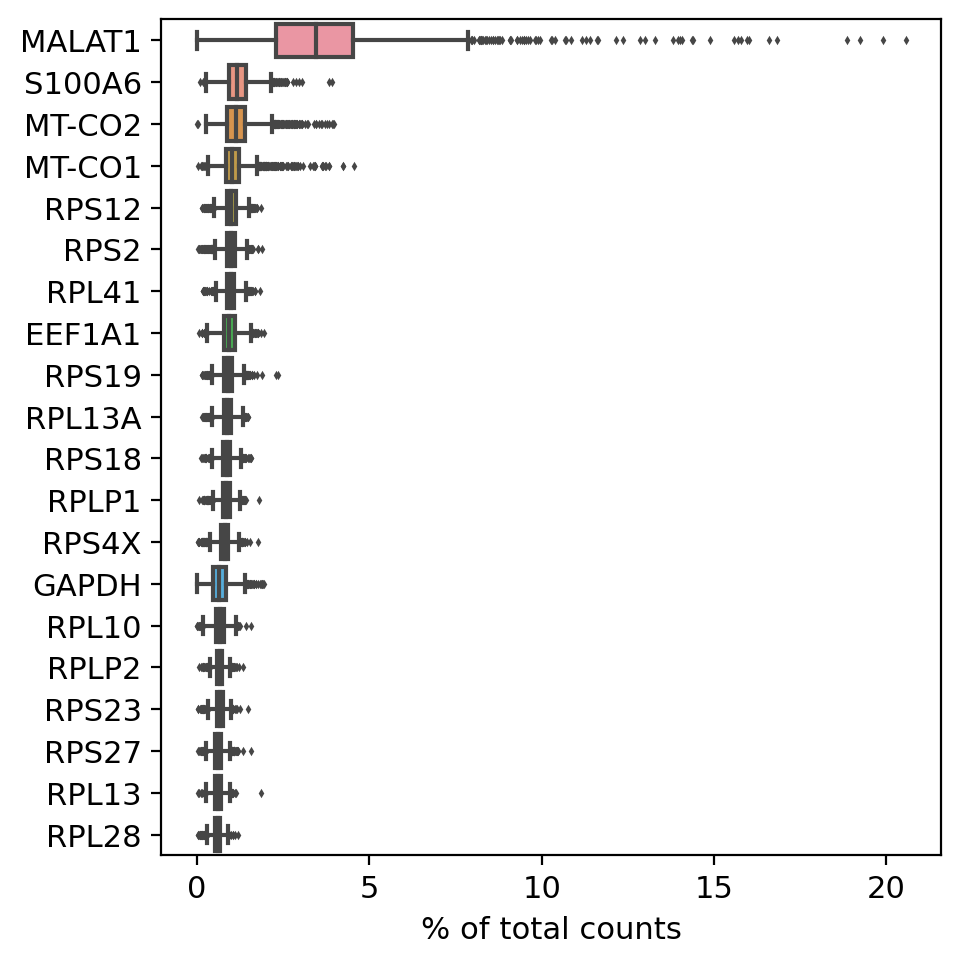

In [11]:
sc.pl.highest_expr_genes(adata,n_top=20)

In [36]:
ldata=scv.read("DD191_2/velocyto/DD191_2.loom")
ldata

AnnData object with n_obs × n_vars = 3938 × 36601
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [38]:
ldata.obs.head()

initial_size_unspliced  initial_size_spliced  \
CellID                                                                    
DD191_2:AACACGTGTGTAACGGx                    1272                  9778   
DD191_2:AAACCTGGTAAGGATTx                    3341                 29613   
DD191_2:AAACGGGAGGCTAGGTx                     791                  5006   
DD191_2:AACGTTGGTCCGTTAAx                    1092                  7465   
DD191_2:AAAGTAGTCTTAACCTx                    2765                 23906   

                           initial_size  
CellID                                   
DD191_2:AACACGTGTGTAACGGx        9778.0  
DD191_2:AAACCTGGTAAGGATTx       29613.0  
DD191_2:AAACGGGAGGCTAGGTx        5006.0  
DD191_2:AACGTTGGTCCGTTAAx        7465.0  
DD191_2:AAAGTAGTCTTAACCTx       23906.0

In [70]:
adata = scv.utils.merge(adata, ldata)

In [73]:
adata.obs.seurat_clusters= pd.Categorical(adata.obs.seurat_clusters)

In [75]:
scv.pl.proportions(adata,groupby="seurat_clusters")

In [76]:
scv.pp.filter_and_normalize(adata)

Normalized count data: X, spliced, unspliced.


In [77]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [78]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:12) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [95]:
adata.layers["velocity"].shape

(3590, 30724)

In [15]:
adata.obsm["X_umap"]

array([[ 2.31493476,  4.82881162],
       [ 2.94532278, -1.49113538],
       [-4.50849888,  1.50463317],
       ...,
       [ 0.05258921, -1.70346966],
       [ 2.24418261, -2.3269284 ],
       [ 1.15475669,  2.98443911]])

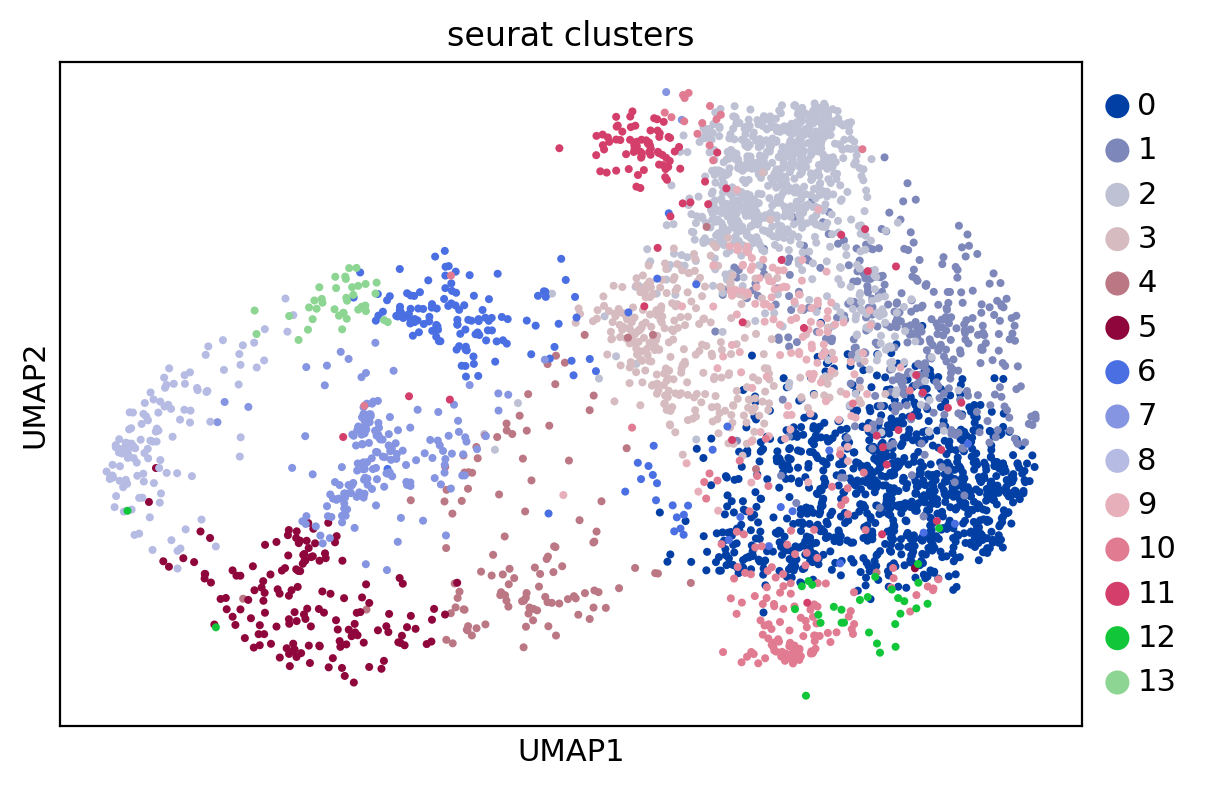

In [18]:
sc.pl.scatter(adata,basis="umap",color="seurat_clusters")

In [101]:
scv.tl.velocity_graph(adata,n_jobs=1)

computing velocity graph (using 1/16 cores)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1, 4) + inhomogeneous part.